In [16]:

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [18]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\mlade\AppData\Local\Temp\ipykernel_18388\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\mlade\AppData\Local\Temp\ipykernel_18388\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [19]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

In [20]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [23]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 7s 6ms/step - loss: 0.4821 - accuracy: 0.7712 - val_loss: 0.3987 - val_accuracy: 0.8094
Epoch 2/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3899 - accuracy: 0.8074 - val_loss: 0.3756 - val_accuracy: 0.8107
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3775 - accuracy: 0.8122 - val_loss: 0.3742 - val_accuracy: 0.8074
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3755 - accuracy: 0.8140 - val_loss: 0.3713 - val_accuracy: 0.7921
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3730 - accuracy: 0.8121 - val_loss: 0.3807 - val_accuracy: 0.8023
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3701 - accuracy: 0.8146 - val_loss: 0.3615 - val_accuracy: 0.8208
Epoch 7/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3712 - accuracy: 0.8123 - val_loss: 0.3670 - val_accuracy: 0.8162

Epoch 58/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3612 - accuracy: 0.8179 - val_loss: 0.3677 - val_accuracy: 0.8135
Epoch 59/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3620 - accuracy: 0.8155 - val_loss: 0.3688 - val_accuracy: 0.8129
Epoch 60/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3628 - accuracy: 0.8164 - val_loss: 0.3731 - val_accuracy: 0.8150
Epoch 61/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3703 - accuracy: 0.8123 - val_loss: 0.3675 - val_accuracy: 0.8143
Epoch 62/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3645 - accuracy: 0.8164 - val_loss: 0.3681 - val_accuracy: 0.8149
Epoch 63/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3636 - accuracy: 0.8160 - val_loss: 0.3750 - val_accuracy: 0.8104
Epoch 64/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3621 - accuracy: 0.8157 - val_loss: 0.3644 - val_accuracy:

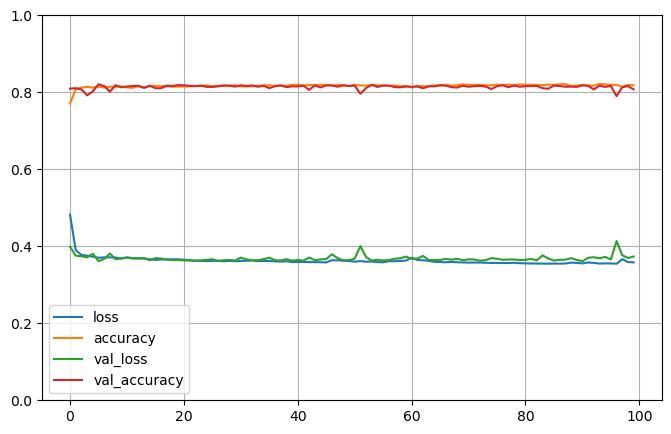

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

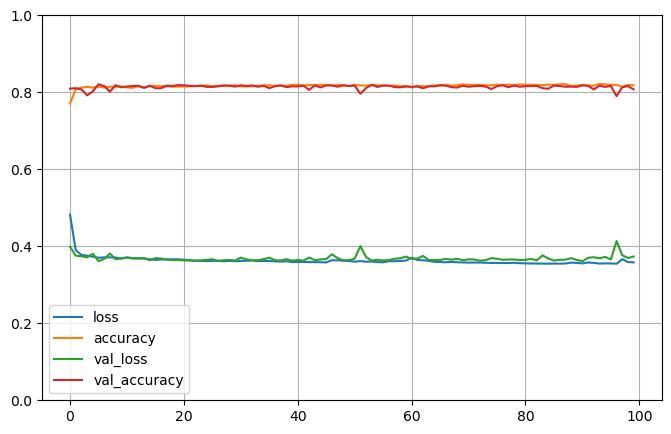

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3735 - accuracy: 0.8076


[0.37353280186653137, 0.8076361417770386]

In [29]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

AttributeError: 'Sequential' object has no attribute 'predict_classes'

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
history2 = model.fit(X_train_scaled , y_train, validation_data= (X_test_scaled , y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3871 - accuracy: 0.8230 - val_loss: 0.3349 - val_accuracy: 0.8444
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3269 - accuracy: 0.8465 - val_loss: 0.3311 - val_accuracy: 0.8452
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3224 - accuracy: 0.8487 - val_loss: 0.3292 - val_accuracy: 0.8462
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3194 - accuracy: 0.8504 - val_loss: 0.3277 - val_accuracy: 0.8464
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3171 - accuracy: 0.8517 - val_loss: 0.3266 - val_accuracy: 0.8463
Epoch 6/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3148 - accuracy: 0.8536 - val_loss: 0.3274 - val_accuracy: 0.8462
Epoch 7/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3132 - accuracy: 0.8529 - val_loss: 0.3262 - val_accuracy: 0.8471

Epoch 58/100
943/943 [==============================] - 2s 3ms/step - loss: 0.2579 - accuracy: 0.8769 - val_loss: 0.3745 - val_accuracy: 0.8461
Epoch 59/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2566 - accuracy: 0.8784 - val_loss: 0.3738 - val_accuracy: 0.8436
Epoch 60/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2569 - accuracy: 0.8780 - val_loss: 0.3755 - val_accuracy: 0.8456
Epoch 61/100
943/943 [==============================] - 2s 3ms/step - loss: 0.2553 - accuracy: 0.8785 - val_loss: 0.3778 - val_accuracy: 0.8458
Epoch 62/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2549 - accuracy: 0.8789 - val_loss: 0.3766 - val_accuracy: 0.8433
Epoch 63/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2536 - accuracy: 0.8794 - val_loss: 0.3835 - val_accuracy: 0.8378
Epoch 64/100
943/943 [==============================] - 2s 3ms/step - loss: 0.2543 - accuracy: 0.8800 - val_loss: 0.3809 - val_accuracy:

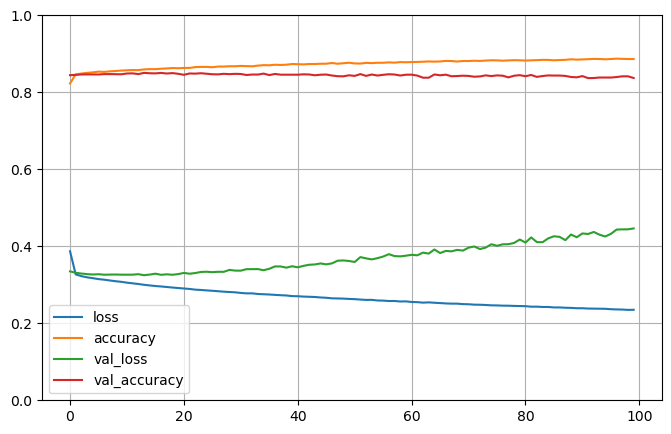

In [31]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


# Zad. 
Stwórz wykres porównujący metody. 

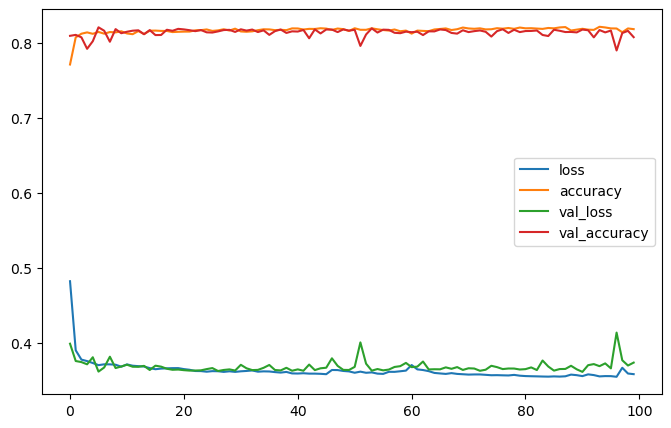

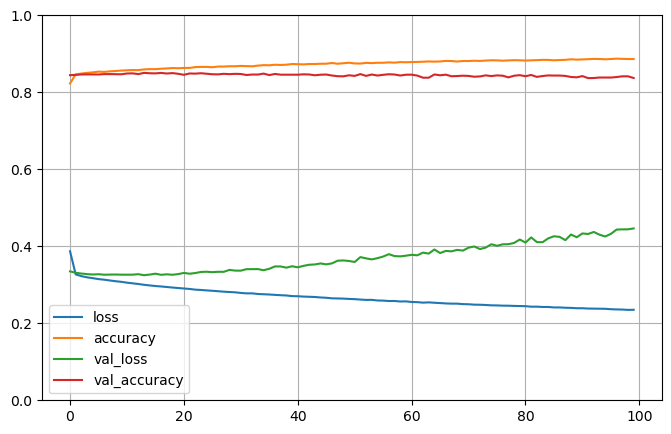

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()